# **Movie Review Sentiment Analysis using RNN**

Dataset : [IMDb Review Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## **Data Preparation**

### 1. Remove Non Alphabetic Characters

In [ ]:
X = data["review"]
y = data["sentiment"]

In [ ]:
X.shape, y.shape

((50000,), (50000,))

In [ ]:
X[0][:250]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of "

In [ ]:
import re
for i in range(X.shape[0]):
    X[i] = re.sub('[^A-Za-z]', ' ', X[i])

In [ ]:
X[0][:250]

'One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked  They are right  as this is exactly what happened with me  br    br   The first thing that struck me about Oz was its brutality and unflinching scenes of '

### 2. Stemming

In [ ]:
for i in range(X.shape[0]):
    X[i] = X[i].split(" ")
    X[i] = [w for w in X[i] if w != ""]

In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
for i in range(X.shape[0]):
    X[i] = [stemmer.stem(w) for w in X[i]]

In [ ]:
" ".join(X[0][:40])

'one of the other review ha mention that after watch just oz episod you ll be hook they are right as thi is exactli what happen with me br br the first thing that struck me about oz wa it'

In [ ]:
for i in range(X.shape[0]):
    X[i] = [w.lower() for w in X[i]]

In [ ]:
" ".join(X[0][:40])

'one of the other review ha mention that after watch just oz episod you ll be hook they are right as thi is exactli what happen with me br br the first thing that struck me about oz wa it'

### 3. Remove Stop Words

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords_ = stopwords.words("english")
",".join(stopwords_)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [ ]:
for i in range(X.shape[0]):
    X[i] = [w for w in X[i] if w not in stopwords_]

In [ ]:
" ".join(X[0][:40])

'one review ha mention watch oz episod hook right thi exactli happen br br first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex'

### 4. Create Bag of Words for every review

In [ ]:
word_dict = {}
for i in range(X.shape[0]):
    for w in X[i]:
        if w not in word_dict:
            word_dict[w] = 0
        word_dict[w] += 1
word_dict = sorted(word_dict.items(), key= lambda x : x[1], reverse=True)

# print most used 20 words

cnt = 0
for k,v in word_dict:
    cnt += 1
    if cnt == 21:
        break
    print(k,v)

br 201954
thi 151030
movi 103284
film 95890
wa 95626
hi 57725
one 55453
like 45210
ha 33400
time 31968
good 30195
make 30035
charact 28364
see 28244
get 27973
watch 27882
veri 27729
even 25363
stori 25285
would 24602


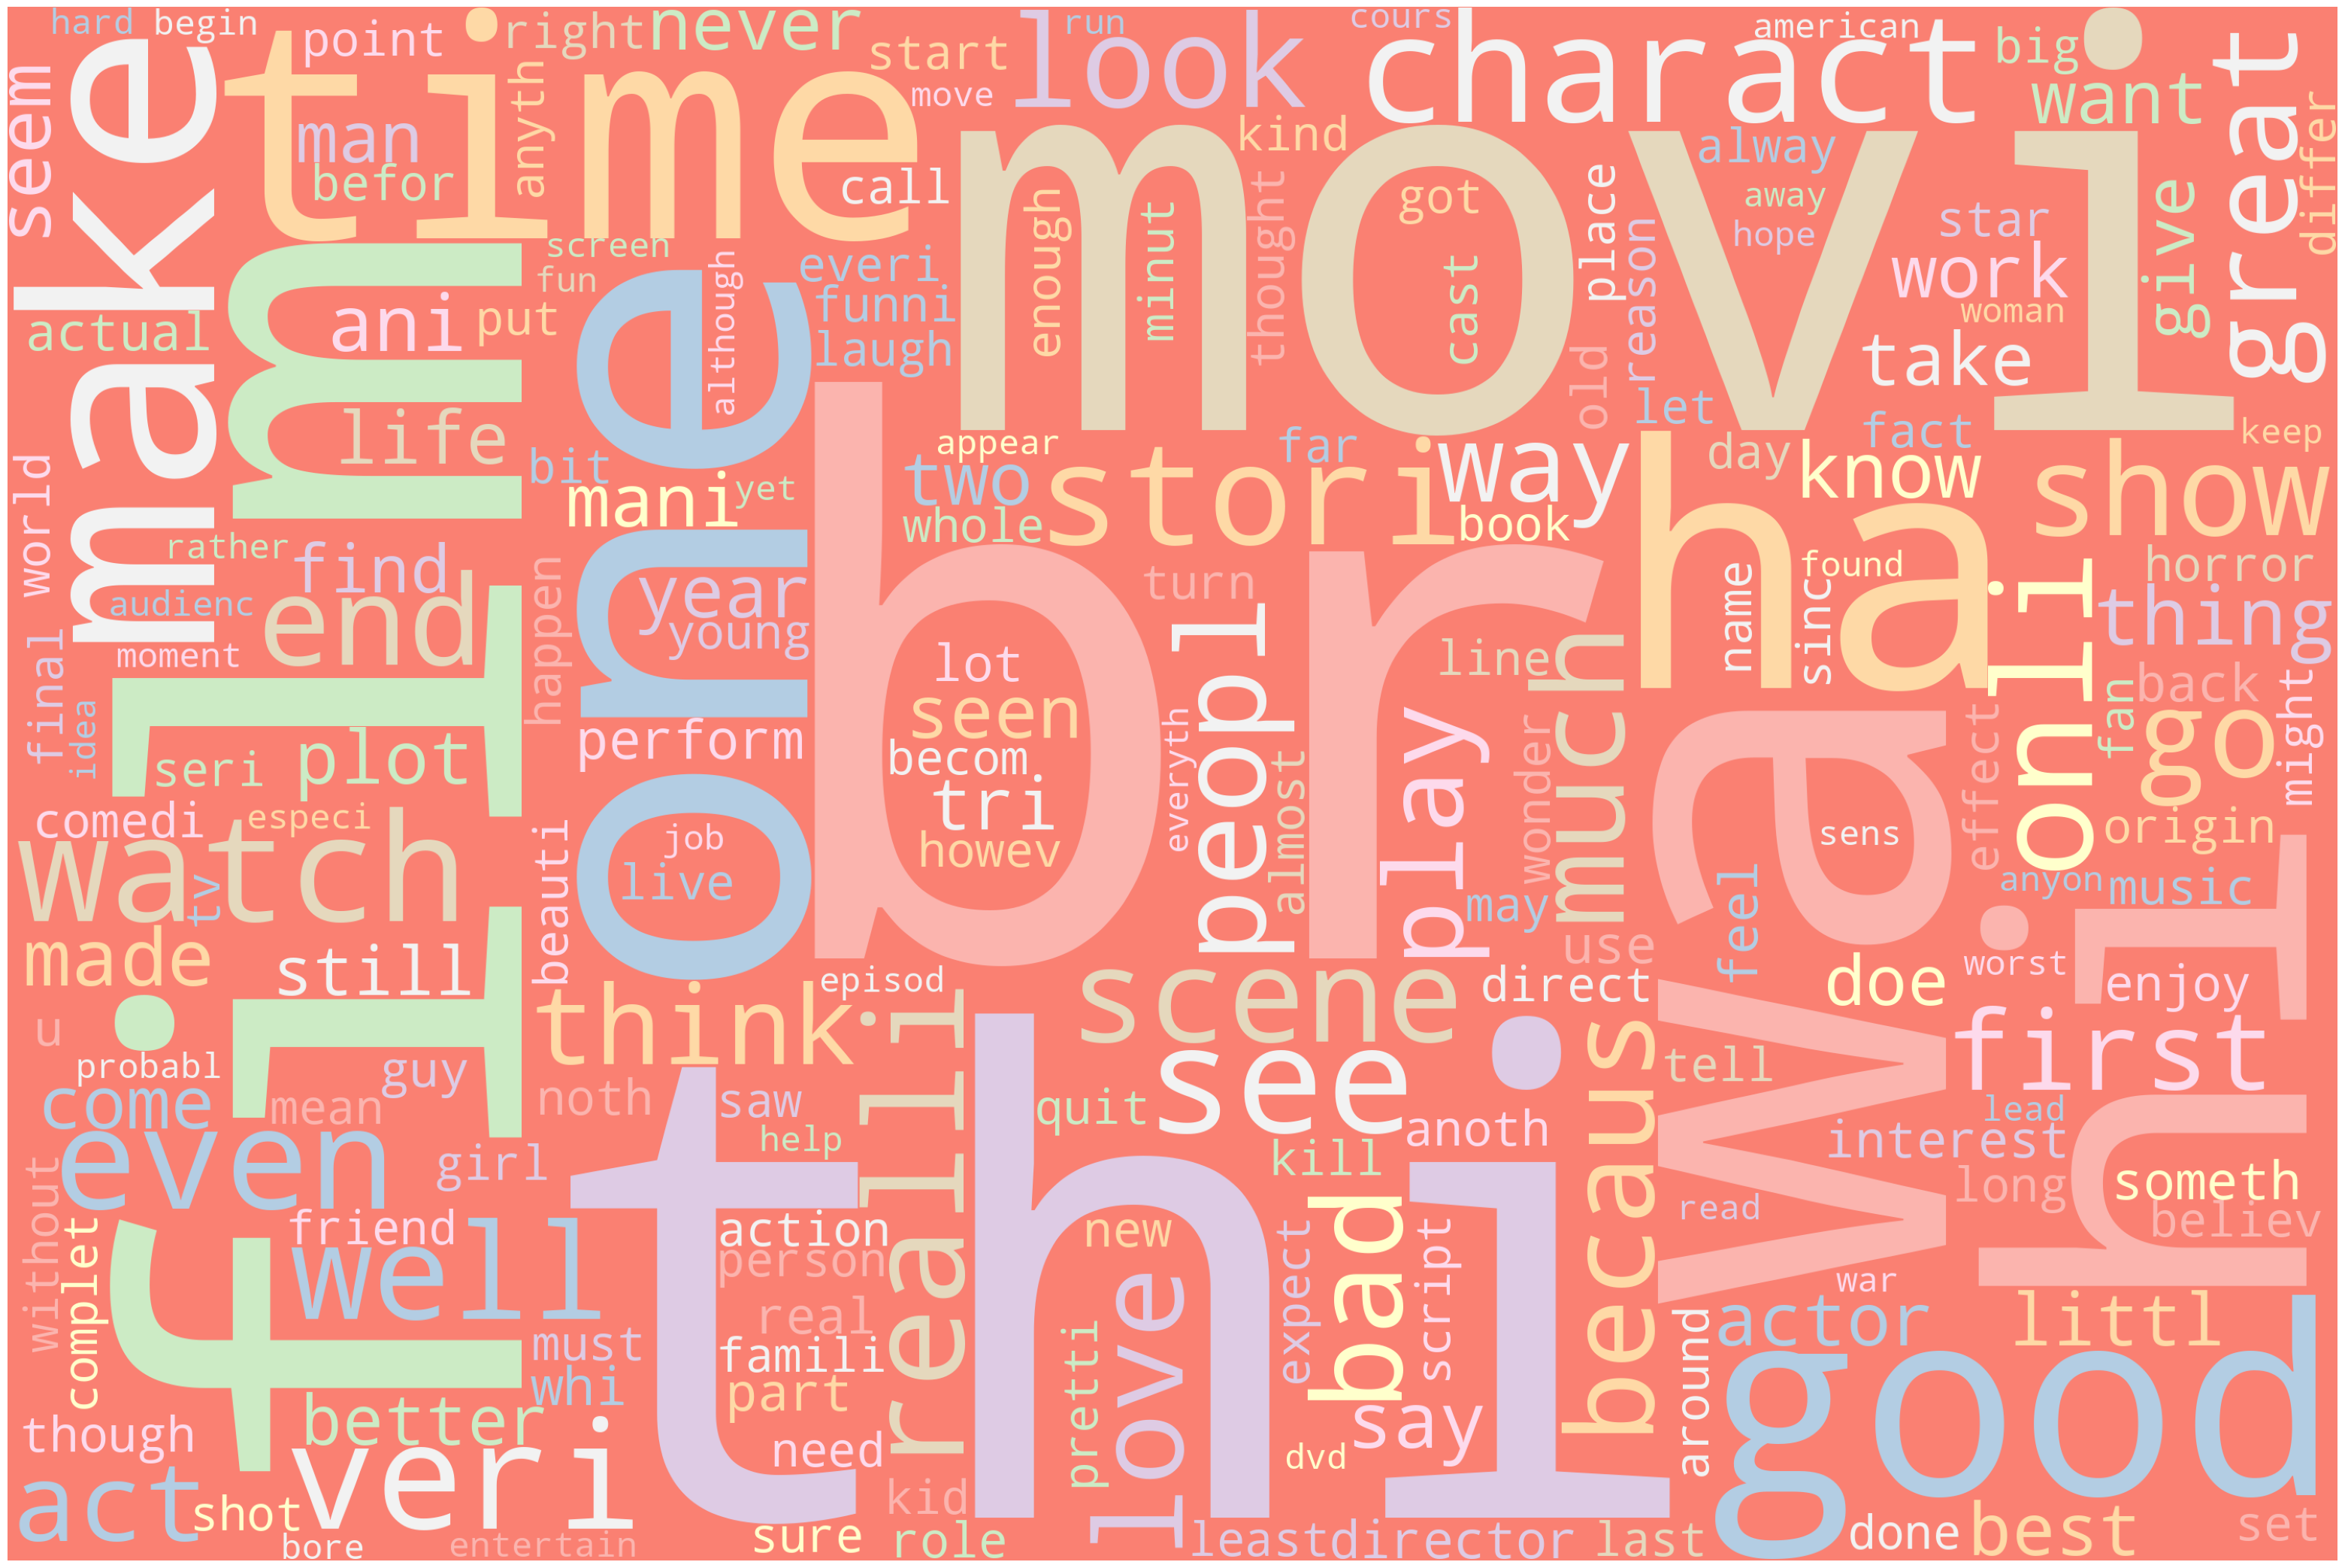

In [ ]:
text = ""
cnt = 0
for k,v in word_dict:
    cnt += 1
    if cnt == 5000:
        break
    for i in range(v):
        text += k + " "

import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off");

from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
plot_cloud(wordcloud)

In [ ]:
most_used_words = {}
cnt = 0
index = 0
for word, freq in word_dict:
    most_used_words[word] = index
    index += 1
    cnt += 1
    if cnt == 5000:
        break
list(most_used_words.items())[0:10]

[('br', 0),
 ('thi', 1),
 ('movi', 2),
 ('film', 3),
 ('wa', 4),
 ('hi', 5),
 ('one', 6),
 ('like', 7),
 ('ha', 8),
 ('time', 9)]

In [ ]:
X_train = []
for i in range(X.shape[0]):
    list_ = []
    for w in X[i]:
        try:
            list_.append(most_used_words[w])
        except:
            pass
    X_train.append(list_)
for i in X_train[0]:
    print(i, end=" ")

6 250 8 366 15 2654 200 1596 122 1 571 117 0 0 35 40 2767 2654 4 1108 23 508 97 122 302 31 1356 1 25 4821 346 1 25 597 1656 1073 614 326 508 3185 249 73 302 0 0 164 2654 318 1819 515 1129 1302 439 3285 1891 771 1879 1775 869 216 237 3630 2510 439 282 51 3383 1059 911 2150 241 2046 419 57 157 176 0 0 19 45 213 807 25 620 113 206 25 1506 678 114 286 1032 2202 189 678 631 678 751 2654 724 118 35 200 62 140 2767 1397 4 1737 45 4 1440 15 376 933 2654 125 237 457 1206 508 508 2891 1706 2578 4295 111 471 14 176 22 985 584 572 4295 104 771 3859 620 312 609 1005 771 356 15 2654 129 145 1821 2617 234 14 450 3384 372 

## **Train using RNN**

In [ ]:
leng = 0
for i in range(len(X_train)):
    leng += len(X_train[i])
leng / len(X_train)

118.94072

In [ ]:
X_train = np.array(X_train)

In [ ]:
import tensorflow as tf
from tensorflow import keras
X_train = keras.preprocessing.sequence.pad_sequences(X_train, 125)

In [ ]:
print(X_train.shape)
for i in X_train[0]:
    print(i, end=" ")

(50000, 125)
346 1 25 597 1656 1073 614 326 508 3185 249 73 302 0 0 164 2654 318 1819 515 1129 1302 439 3285 1891 771 1879 1775 869 216 237 3630 2510 439 282 51 3383 1059 911 2150 241 2046 419 57 157 176 0 0 19 45 213 807 25 620 113 206 25 1506 678 114 286 1032 2202 189 678 631 678 751 2654 724 118 35 200 62 140 2767 1397 4 1737 45 4 1440 15 376 933 2654 125 237 457 1206 508 508 2891 1706 2578 4295 111 471 14 176 22 985 584 572 4295 104 771 3859 620 312 609 1005 771 356 15 2654 129 145 1821 2617 234 14 450 3384 372 

In [ ]:
y[0:5]

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [ ]:
y = [1 if i=="positive" else 0 for i in y]
y[0:5]

[1, 1, 1, 0, 1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, np.array(y), test_size = 0.2)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(5000, 32, input_length=125))
model.add(keras.layers.LSTM(100, return_sequences = True))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.LSTM(100, return_sequences = False))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss=keras.losses.binary_crossentropy, metrics="accuracy")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 125, 32)           160000    
                                                                 
 lstm_2 (LSTM)               (None, 125, 100)          53200     
                                                                 
 dropout_2 (Dropout)         (None, 125, 100)          0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 293701 (1.12 MB)
Trainable params: 29370

In [ ]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(
    monitor = "val_accuracy",
    factor = 0.5,
    patience = 3,
    verbose = 1,
    min_lr = 0.00001
)
early_stopping = keras.callbacks.EarlyStopping(patience=5, verbose=1)
mcp_save = keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min', verbose = 1)

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/10
1250/1250 [==============================] - ETA: 0s - loss: 0.3820 - accuracy: 0.8268
Epoch 1: val_loss improved from inf to 0.30963, saving model to .mdl_wts.hdf5
1250/1250 [==============================] - 231s 183ms/step - loss: 0.3820 - accuracy: 0.8268 - val_loss: 0.3096 - val_accuracy: 0.8730 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - ETA: 0s - loss: 0.2848 - accuracy: 0.8876
Epoch 2: val_loss improved from 0.30963 to 0.29842, saving model to .mdl_wts.hdf5
1250/1250 [==============================] - 250s 200ms/step - loss: 0.2848 - accuracy: 0.8876 - val_loss: 0.2984 - val_accuracy: 0.8759 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - ETA: 0s - loss: 0.2597 - accuracy: 0.8985
Epoch 3: val_loss improved from 0.29842 to 0.29463, saving model to .mdl_wts.hdf5
1250/1250 [==============================] - 219s 175ms/step - loss: 0.2597 - accuracy: 0.8985 - val_loss: 0.2946 - val_accuracy: 0.8807 - lr: 0.0010
Epoch 4/10
125

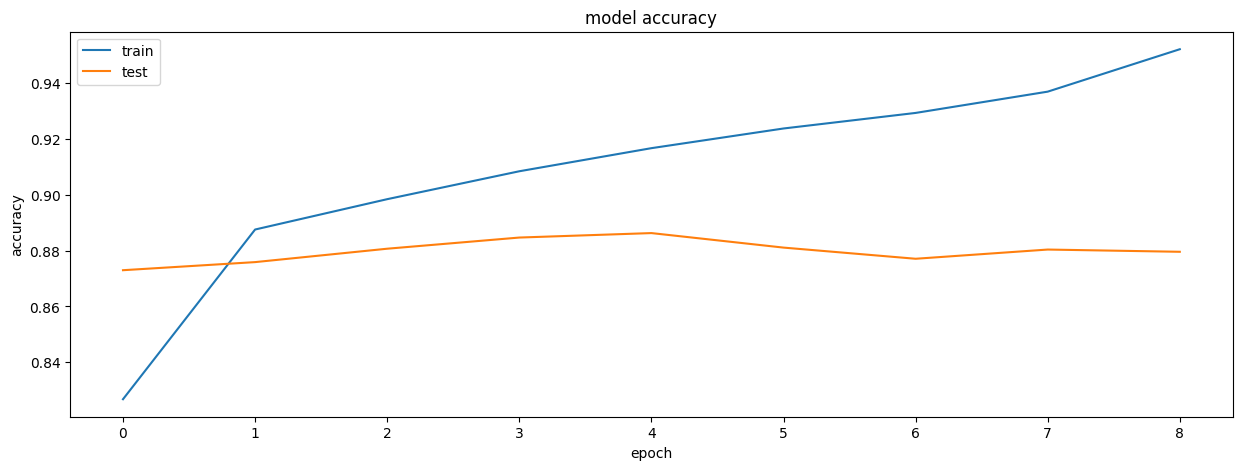

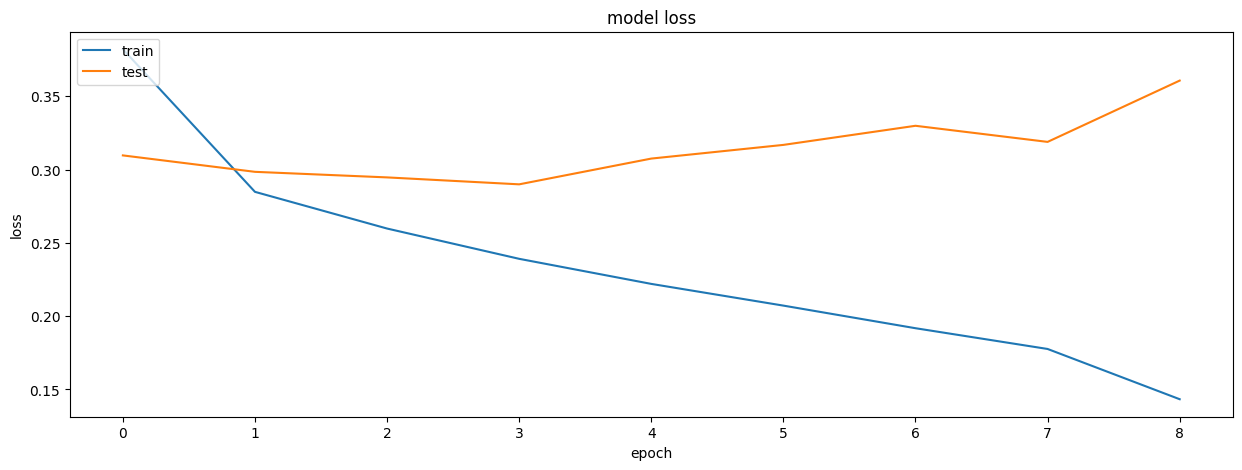

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data = (X_test, y_test),
                   callbacks = [learning_rate_reduction, early_stopping, mcp_save])
plot_history(history)

## **Prediksi**

In [ ]:
def predict(review):
    # remove non alphabetic characters
    review = re.sub('[^A-Za-z]', ' ', review)

    # stemming
    review = review.split(" ")
    review = [w for w in review if w != ""]
    review = [stemmer.stem(w) for w in review]

    # remove stepwords
    review = [w for w in review if w not in stopwords_]

    # get bag of words
    list_ = []
    for w in review:
        try:
            list_.append(most_used_words[w])
        except:
            pass
    test = [list_]
    test = np.array(test)
    test = keras.preprocessing.sequence.pad_sequences(test, 125)
    pred = model.predict(test)[0][0]
    print("Positive : ", pred)
    print("Negative : ", 1-pred)

In [ ]:
negative_review = "Where to start???? Very cheap story,bad acting,cant understand other people reviews ,especially about Florence acting,she have so stubborn face exprecions,anoying voice overal. Sarcasm all the time through the movie and not funny at all in any moment. To much talking and almost none action. Avoid this at any stake,dont waste money in cinema."

In [ ]:
predict(negative_review)

1/1 [==============================] - 1s 767ms/step
Positive :  0.0013805329
Negative :  0.9986194671364501


In [ ]:
positive_review = "This was really fun. Frances Pugh was SUPPOSED to carry the movie as she is in the new Hawkeye series this year. It was fun to see one of the human superheros in action, no special powers. It is like Jason Bourne which is great. I'm glad we didn't spend time watching her be tortured as a child. Very exciting and heartwarming at the same time. No avenger cameos to detract from the film. It's fun and different."

In [ ]:
predict(positive_review)

1/1 [==============================] - 0s 92ms/step
Positive :  0.9968612
Negative :  0.0031387805938720703
